# Preliminary Data Exploration and Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obesity = pd.read_csv("obesity.csv")
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
obesity.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

## Plot target histogram

In [5]:
# change the target name from "NObeyesdad" to "target"
obesity.rename(columns={"NObeyesdad": "Target"}, inplace=True)

# Count occurrences
feature = "Target"
counts = obesity[feature].value_counts().sort_index()

In [6]:
# Set seaborn properties
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.1)
plt.rcParams.update({
    "figure.dpi": 300,              # High-resolution output
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelsize": 13,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "font.family": "serif",
    "savefig.bbox": "tight"
})

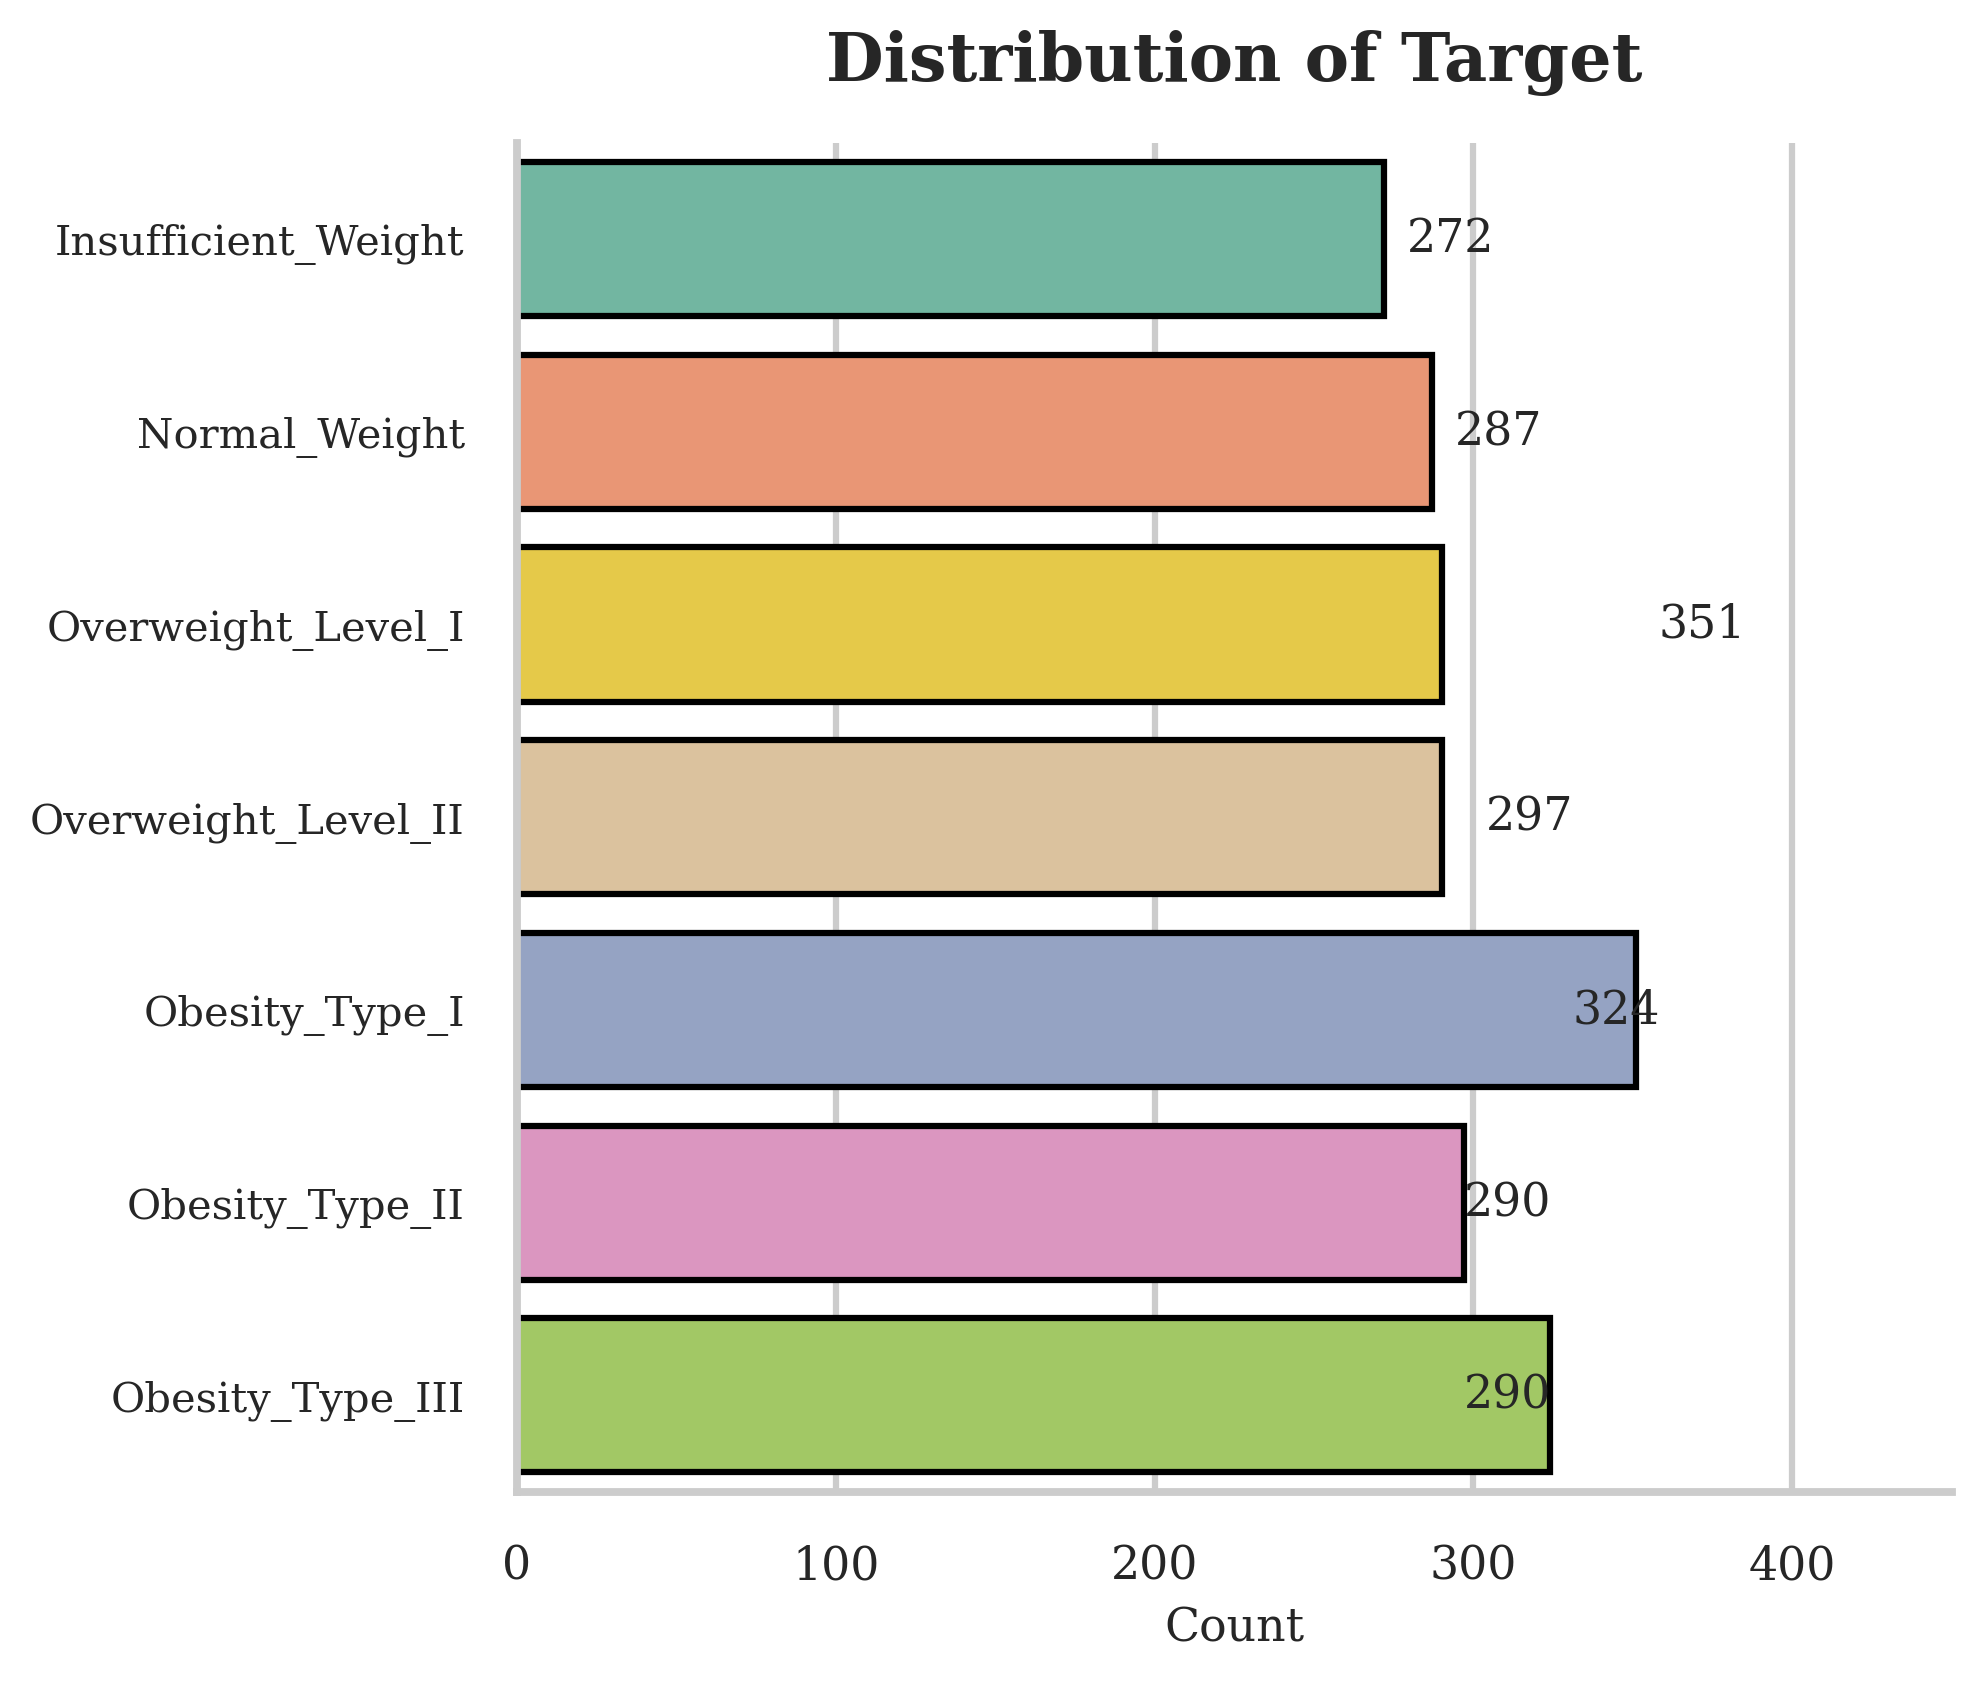

In [7]:
fig, ax = plt.subplots(figsize=(7,6))

custom_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
sns.barplot(
    y=counts.index,
    x=counts.values,
    hue=counts.index,
    palette="Set2",
    order=custom_order,
    legend=False,
    edgecolor="black",
    ax=ax
)

for i, val in enumerate(counts.values):
    ax.text(val + counts.max() * 0.02, i, f"{val}", va="center", fontsize=11)

ax.set_title(f"Distribution of {feature}", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=11)
#ax.set_ylabel(feature, fontsize=11)
ax.set_ylabel("") 
ax.set_xlim(0, 450)

plt.xticks(fontsize=11)  
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig(f"{feature}_distribution_horizontal_bar.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: the target is quite balance so we have no imbalance problem here.

## Plot Target vs Age

In [8]:
obesity.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


In [9]:
obesity.Target.value_counts()

Target
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

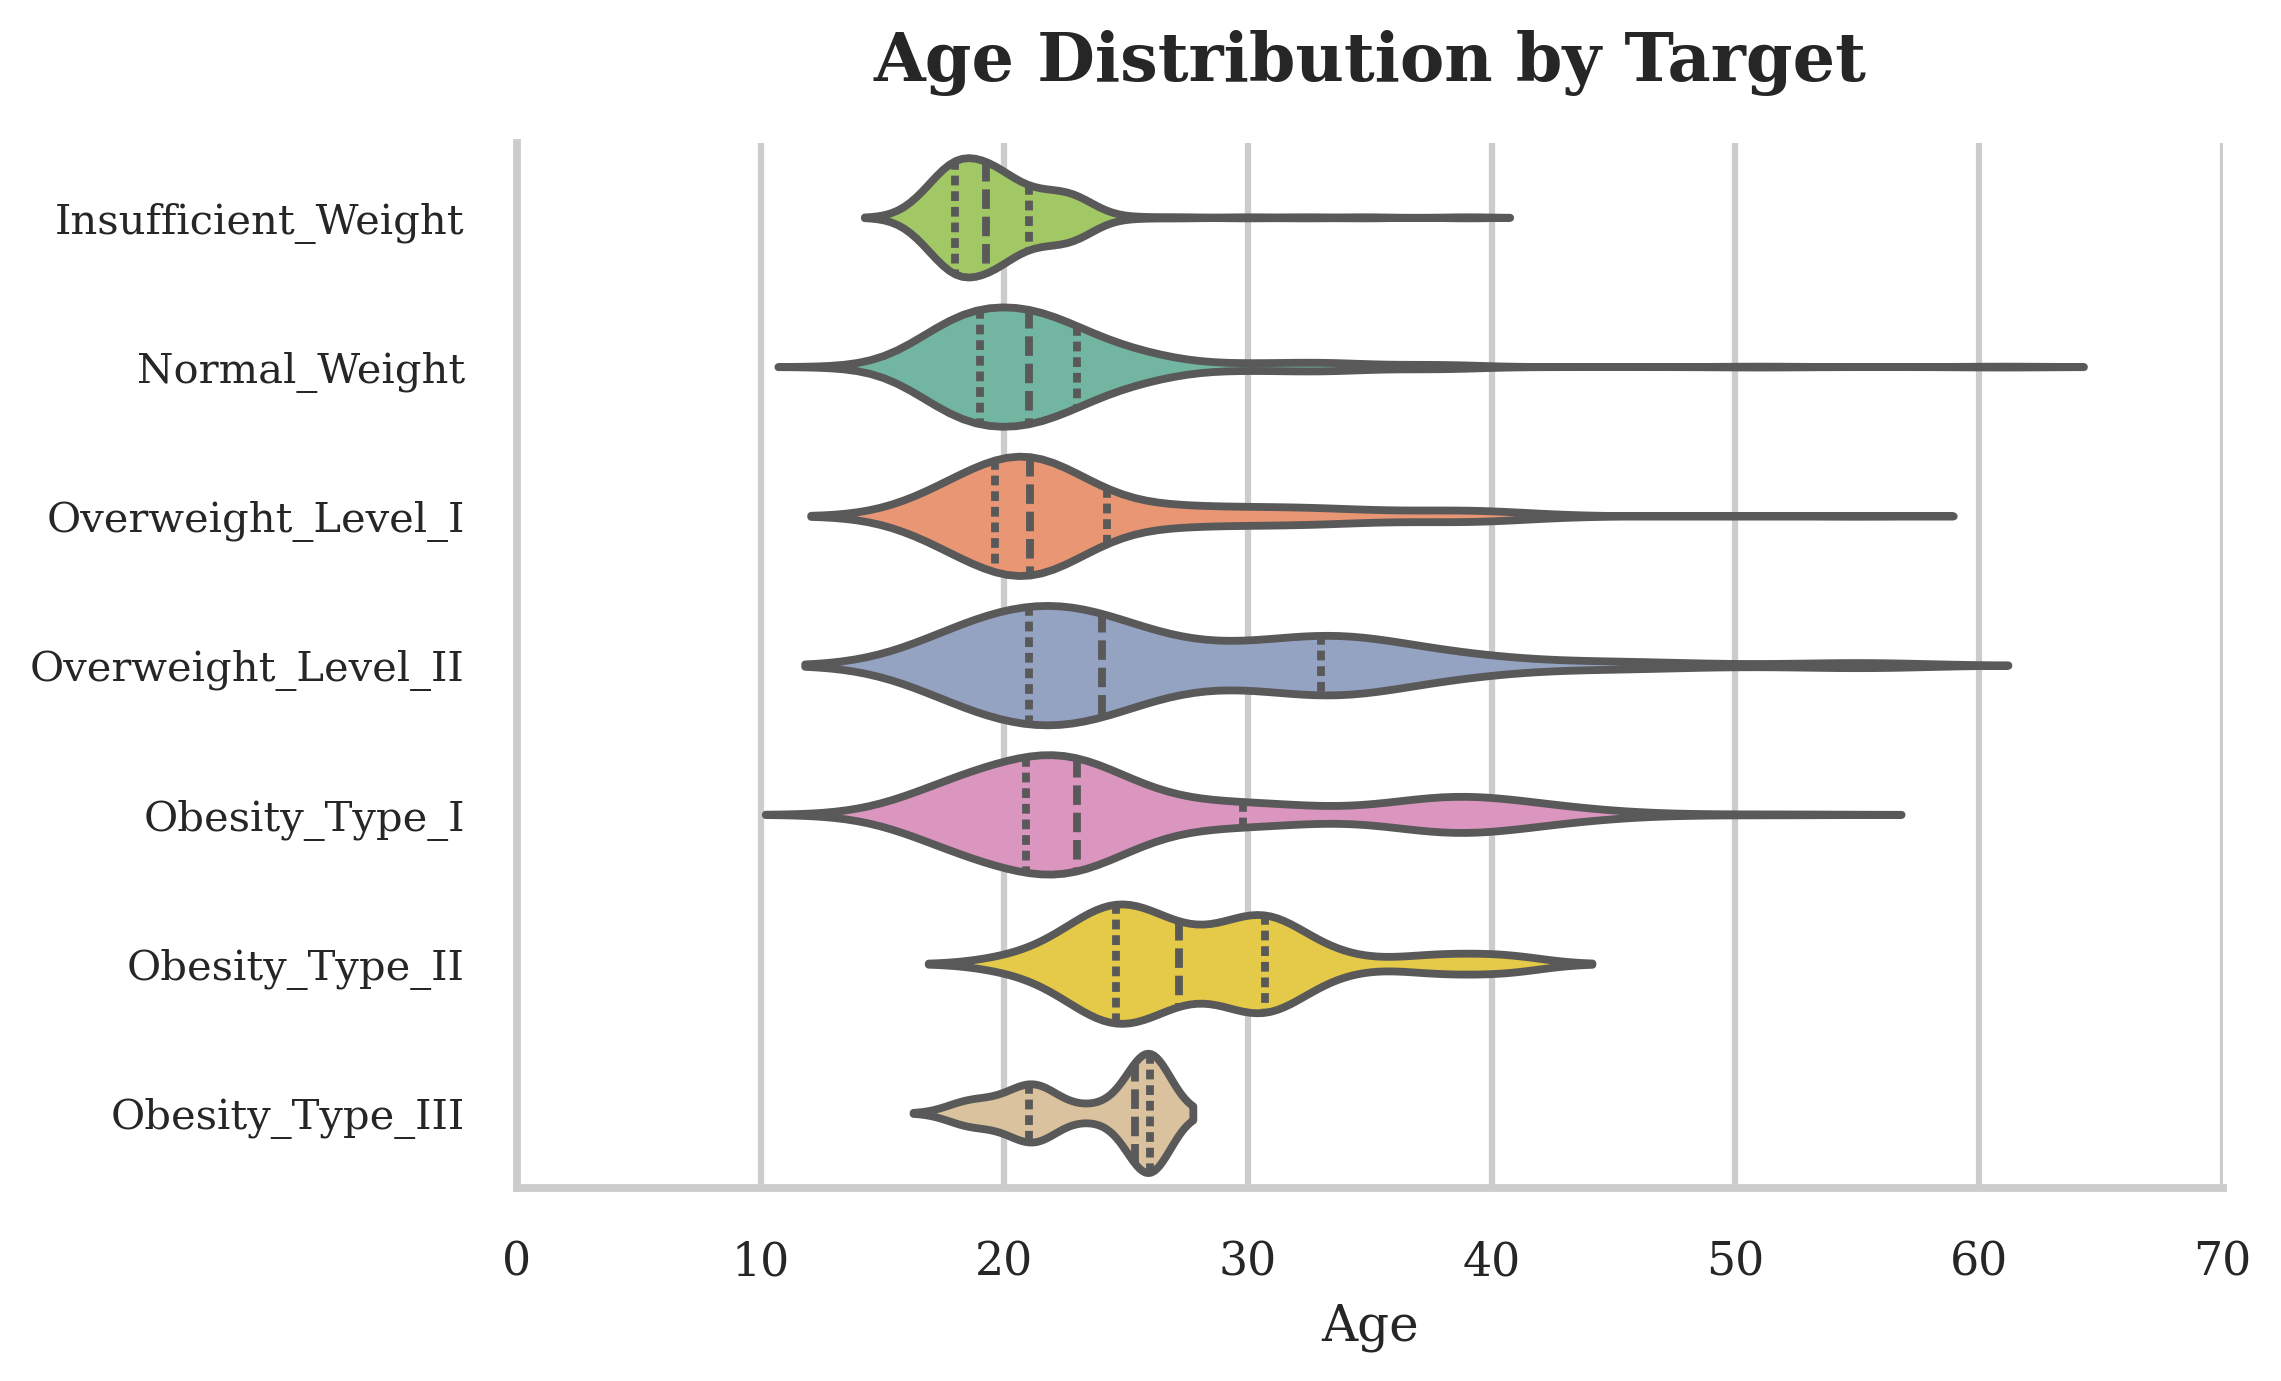

In [10]:
plt.figure(figsize=(8, 5))

custom_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
ax = sns.violinplot(
    y="Target",
    x="Age",
    hue="Target",
    data=obesity,
    order=custom_order,
    palette="Set2",
    inner="quartile",
    legend=False
)

plt.title("Age Distribution by Target", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Age", fontsize=12)
ax.set_ylabel("")  
ax.set_xlim(0, 70)

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig(f"age_distribution_by_target.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: Insufficient weight mainly happened in youb=nger age. Obesity type II and III usually happened in older age.

## Plot Target vs Weight

In [11]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

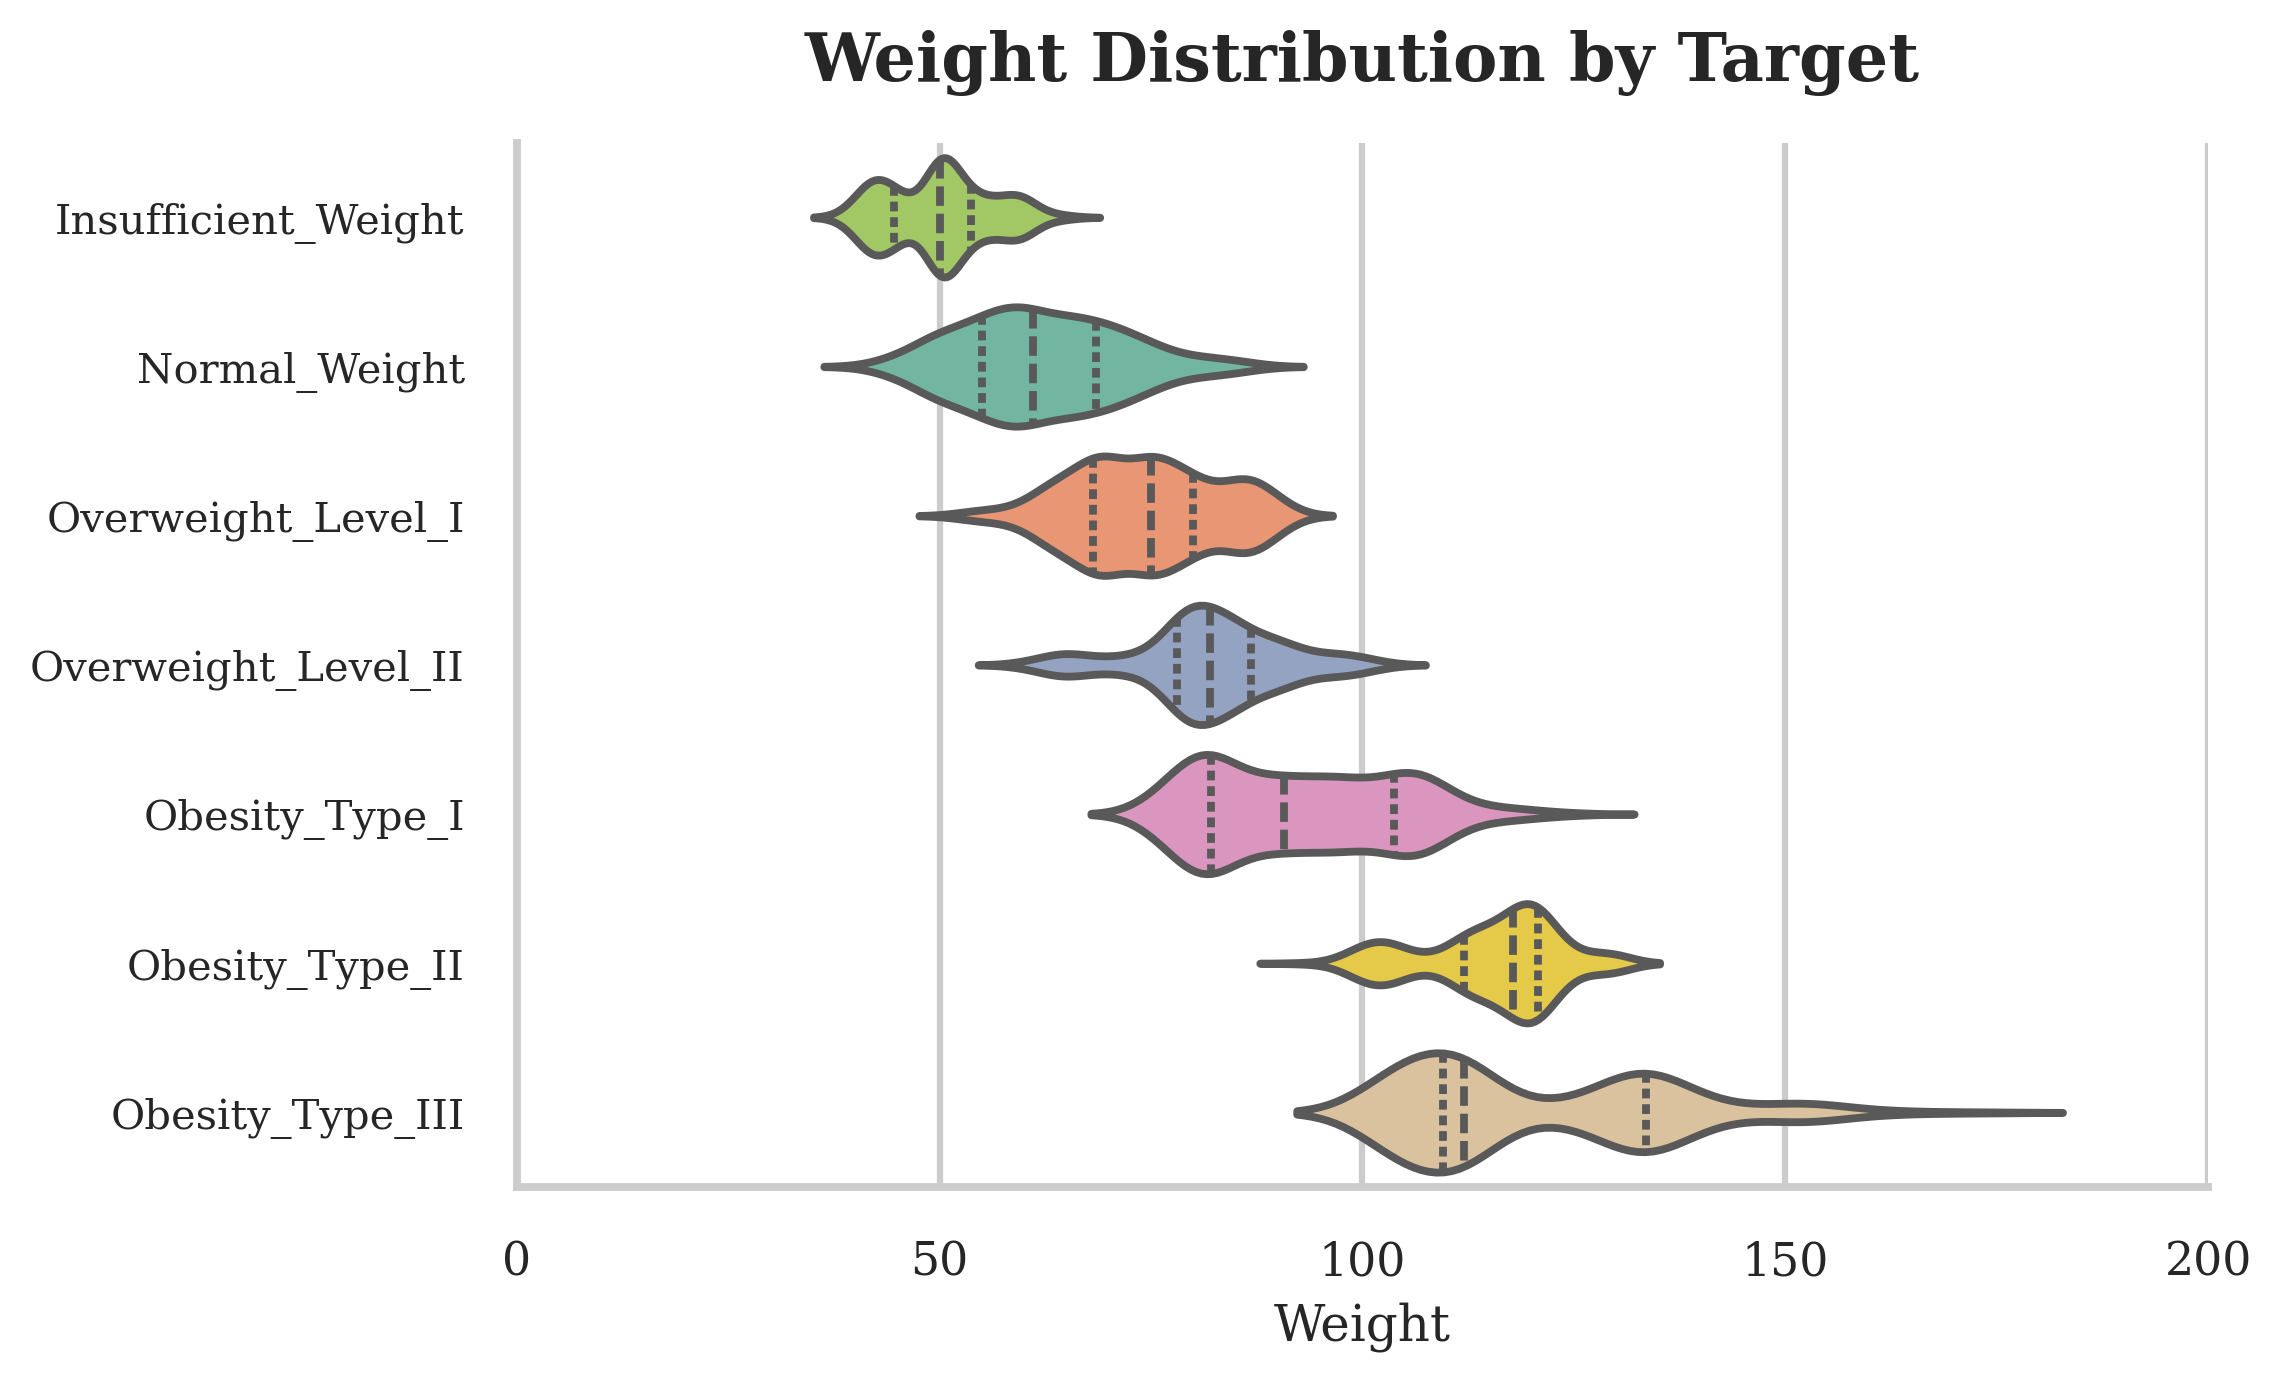

In [12]:
plt.figure(figsize=(8, 5))

custom_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
ax = sns.violinplot(
    y="Target",
    x="Weight",
    hue="Target",
    data=obesity,
    order=custom_order,
    palette="Set2",
    inner="quartile",
    legend=False
)

plt.title("Weight Distribution by Target", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Weight", fontsize=12)
ax.set_ylabel("")  
ax.set_xlim(0, 200)

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig(f"weight_distribution_by_target.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: The obese ussually has higher weight compare to normal and overweight people.

## Plot Smoke vs Weight

In [13]:
obesity.SMOKE.value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

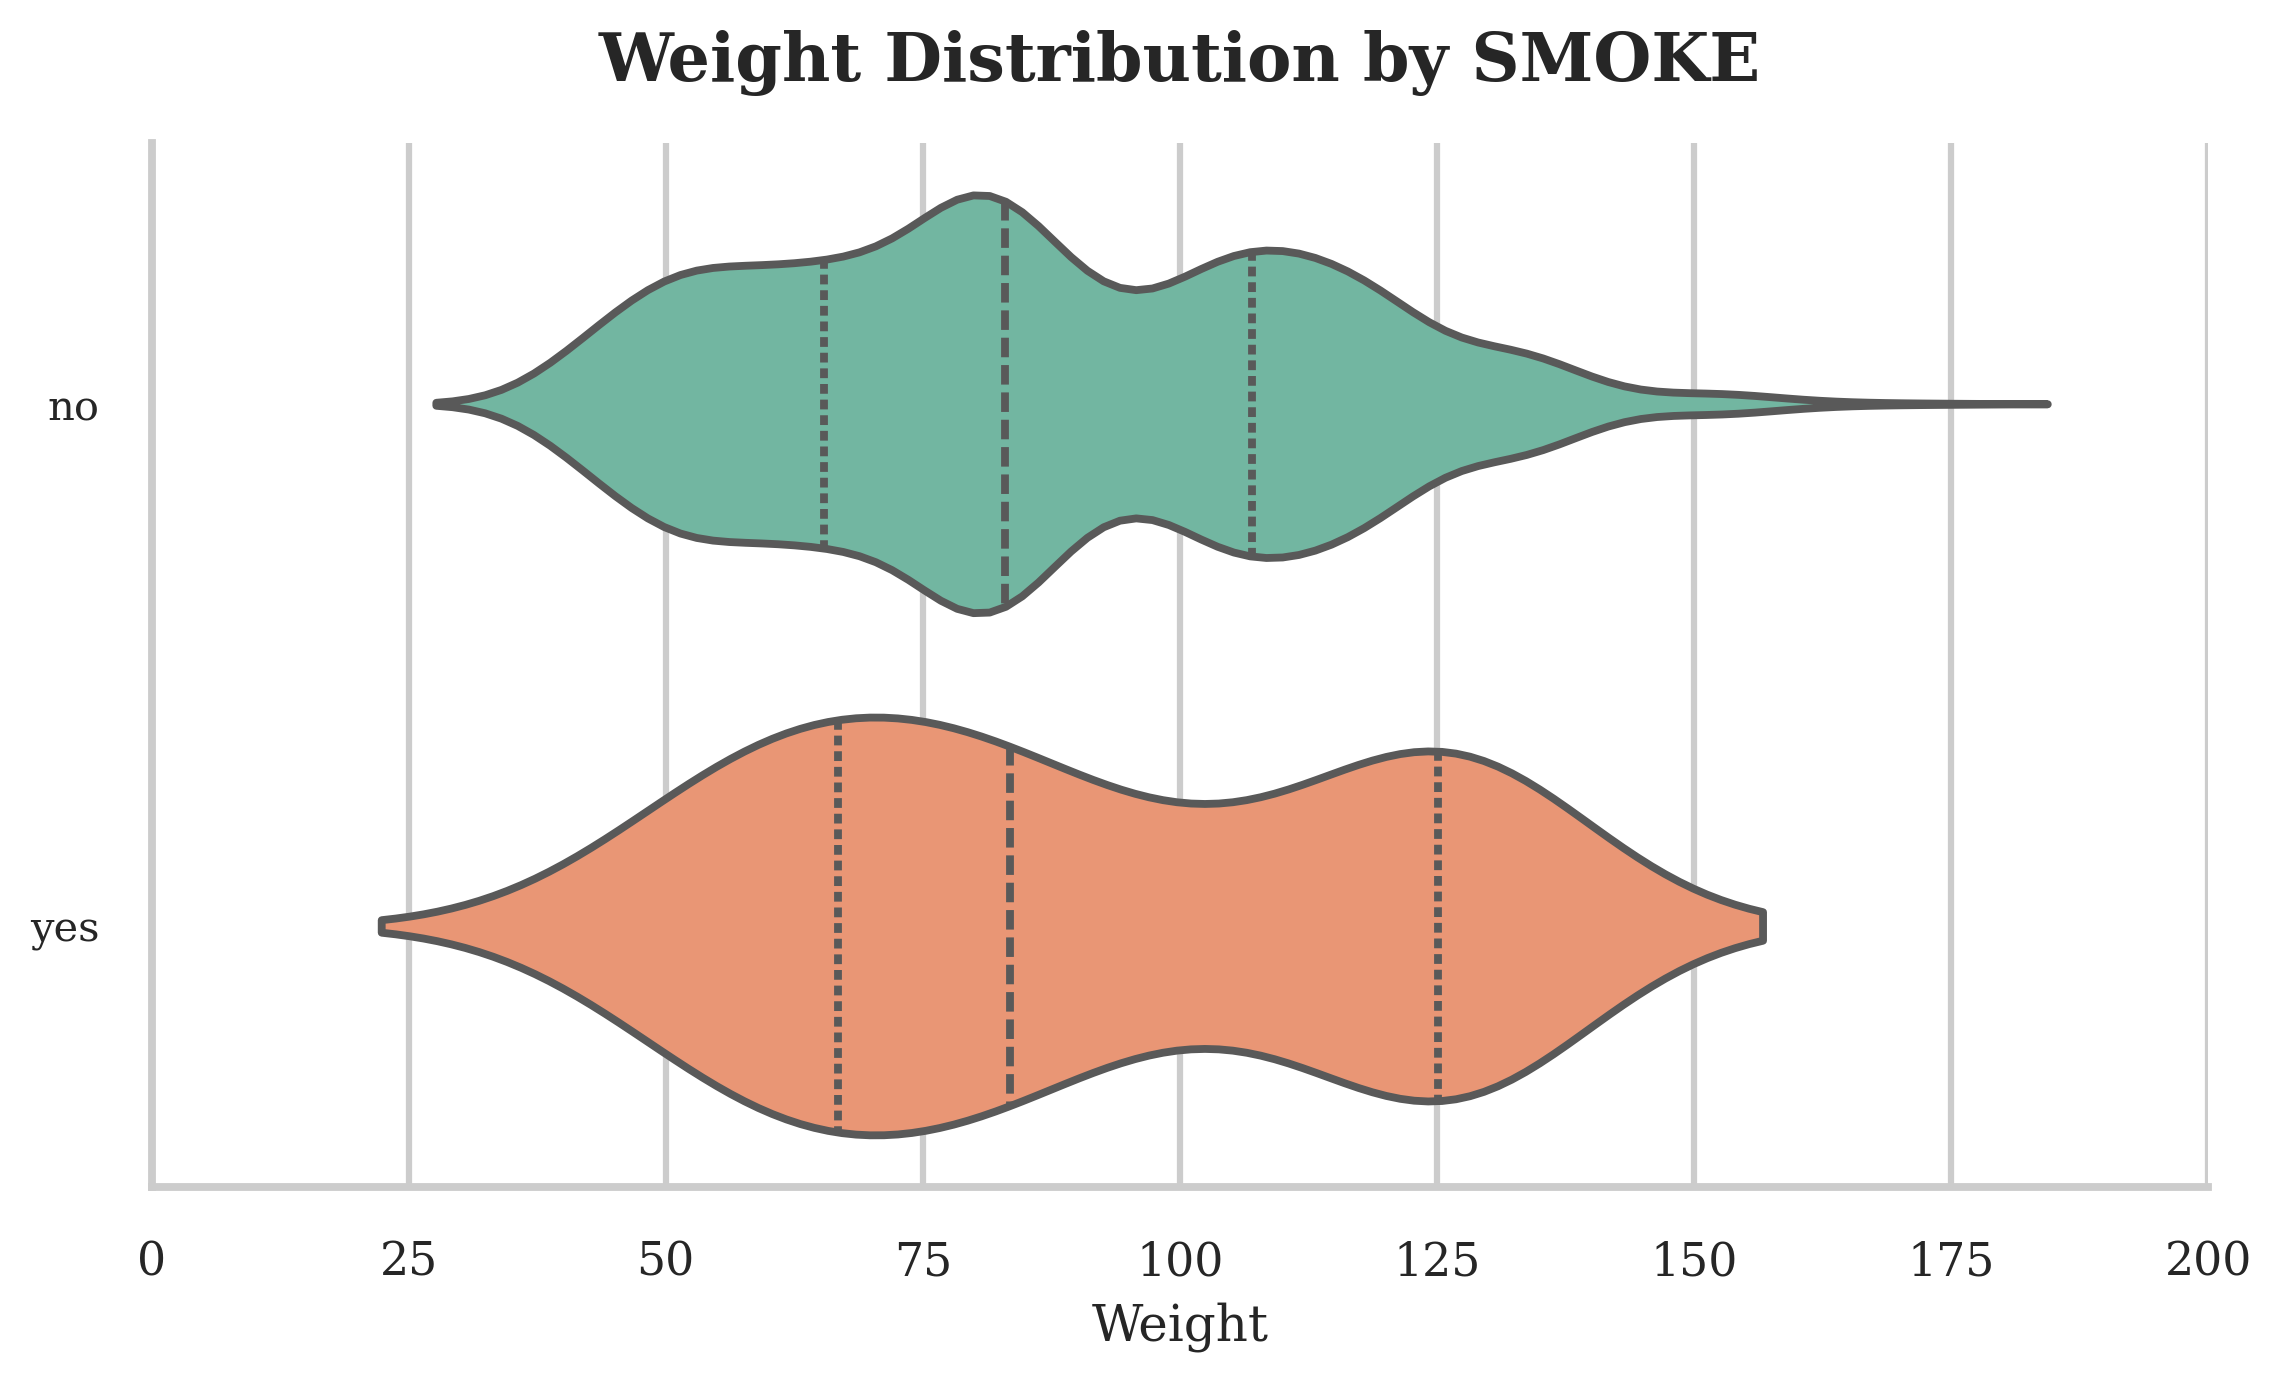

In [14]:
plt.figure(figsize=(8, 5))

#custom_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
ax = sns.violinplot(
    y="SMOKE",
    x="Weight",
    hue="SMOKE",
    data=obesity,
    #order=custom_order,
    palette="Set2",
    inner="quartile",
    legend=False
)

plt.title("Weight Distribution by SMOKE", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Weight", fontsize=12)
ax.set_ylabel("")  
ax.set_xlim(0, 200)

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig(f"weight_distribution_by_SMOKE.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: the Q2 and Q1 are the same, but the Q3, the smoker has higher Q3 than non smoker.

## Plot Smoke vs Age

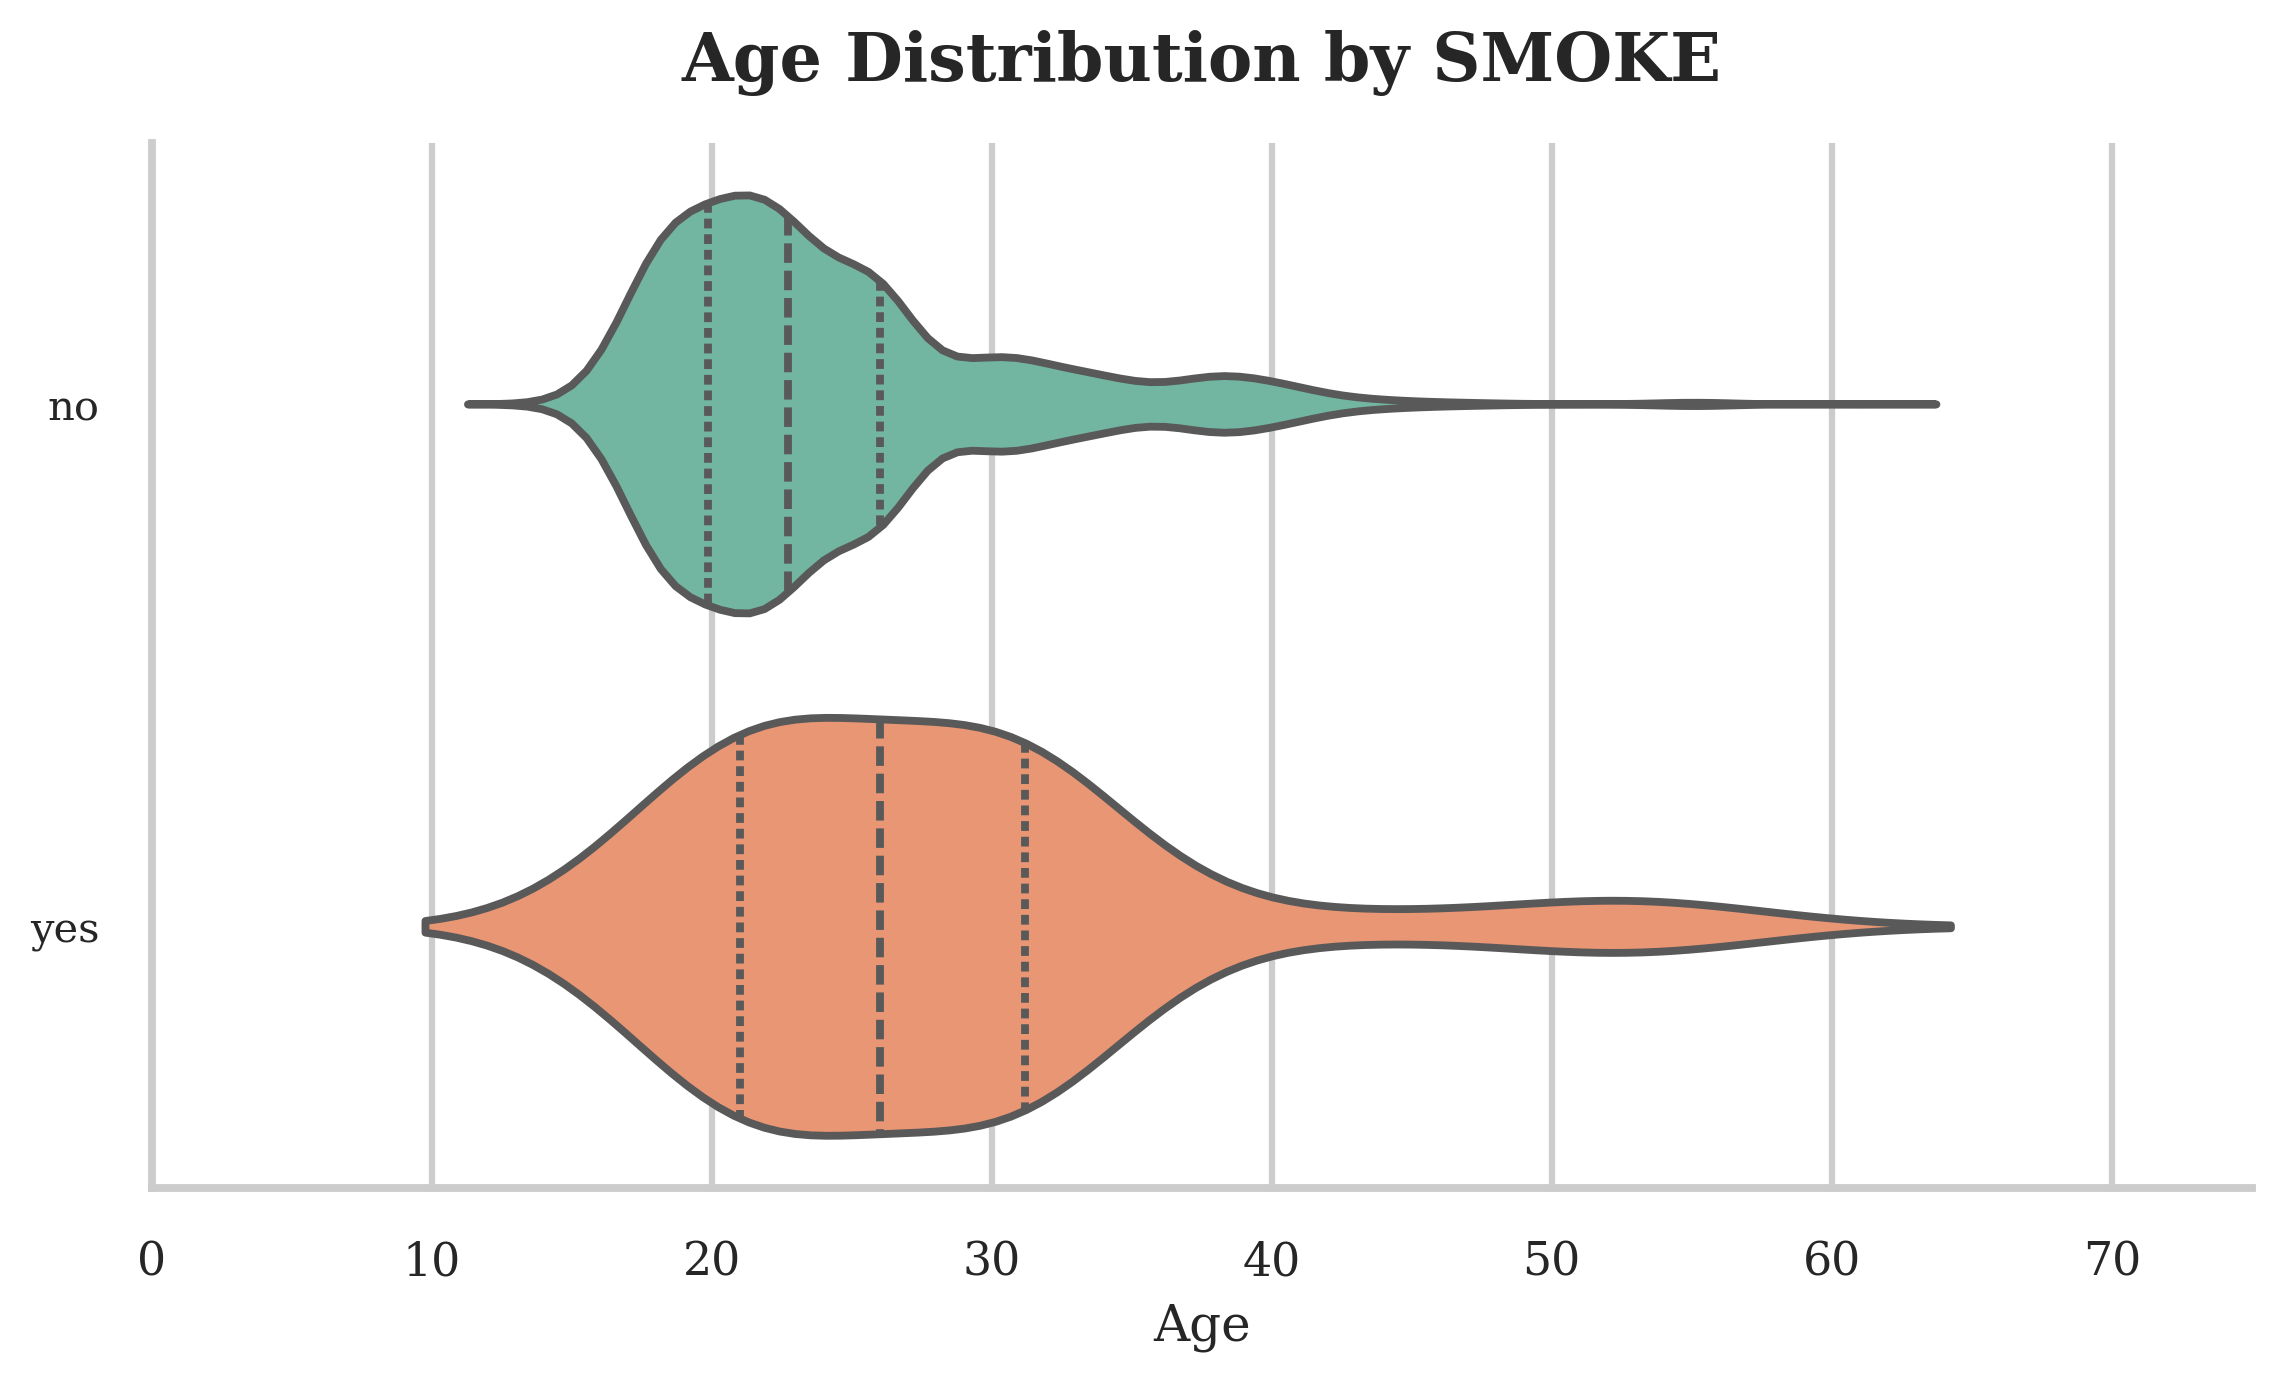

In [15]:
plt.figure(figsize=(8, 5))

#custom_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
ax = sns.violinplot(
    y="SMOKE",
    x="Age",
    hue="SMOKE",
    data=obesity,
    #order=custom_order,
    palette="Set2",
    inner="quartile",
    legend=False
)

plt.title("Age Distribution by SMOKE", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Age", fontsize=12)
ax.set_ylabel("")  
ax.set_xlim(0, 75)

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig(f"Age_distribution_by_SMOKE.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: Smoker's age tends to higher than non smoker.

## Scatter Plot Age vs Weight

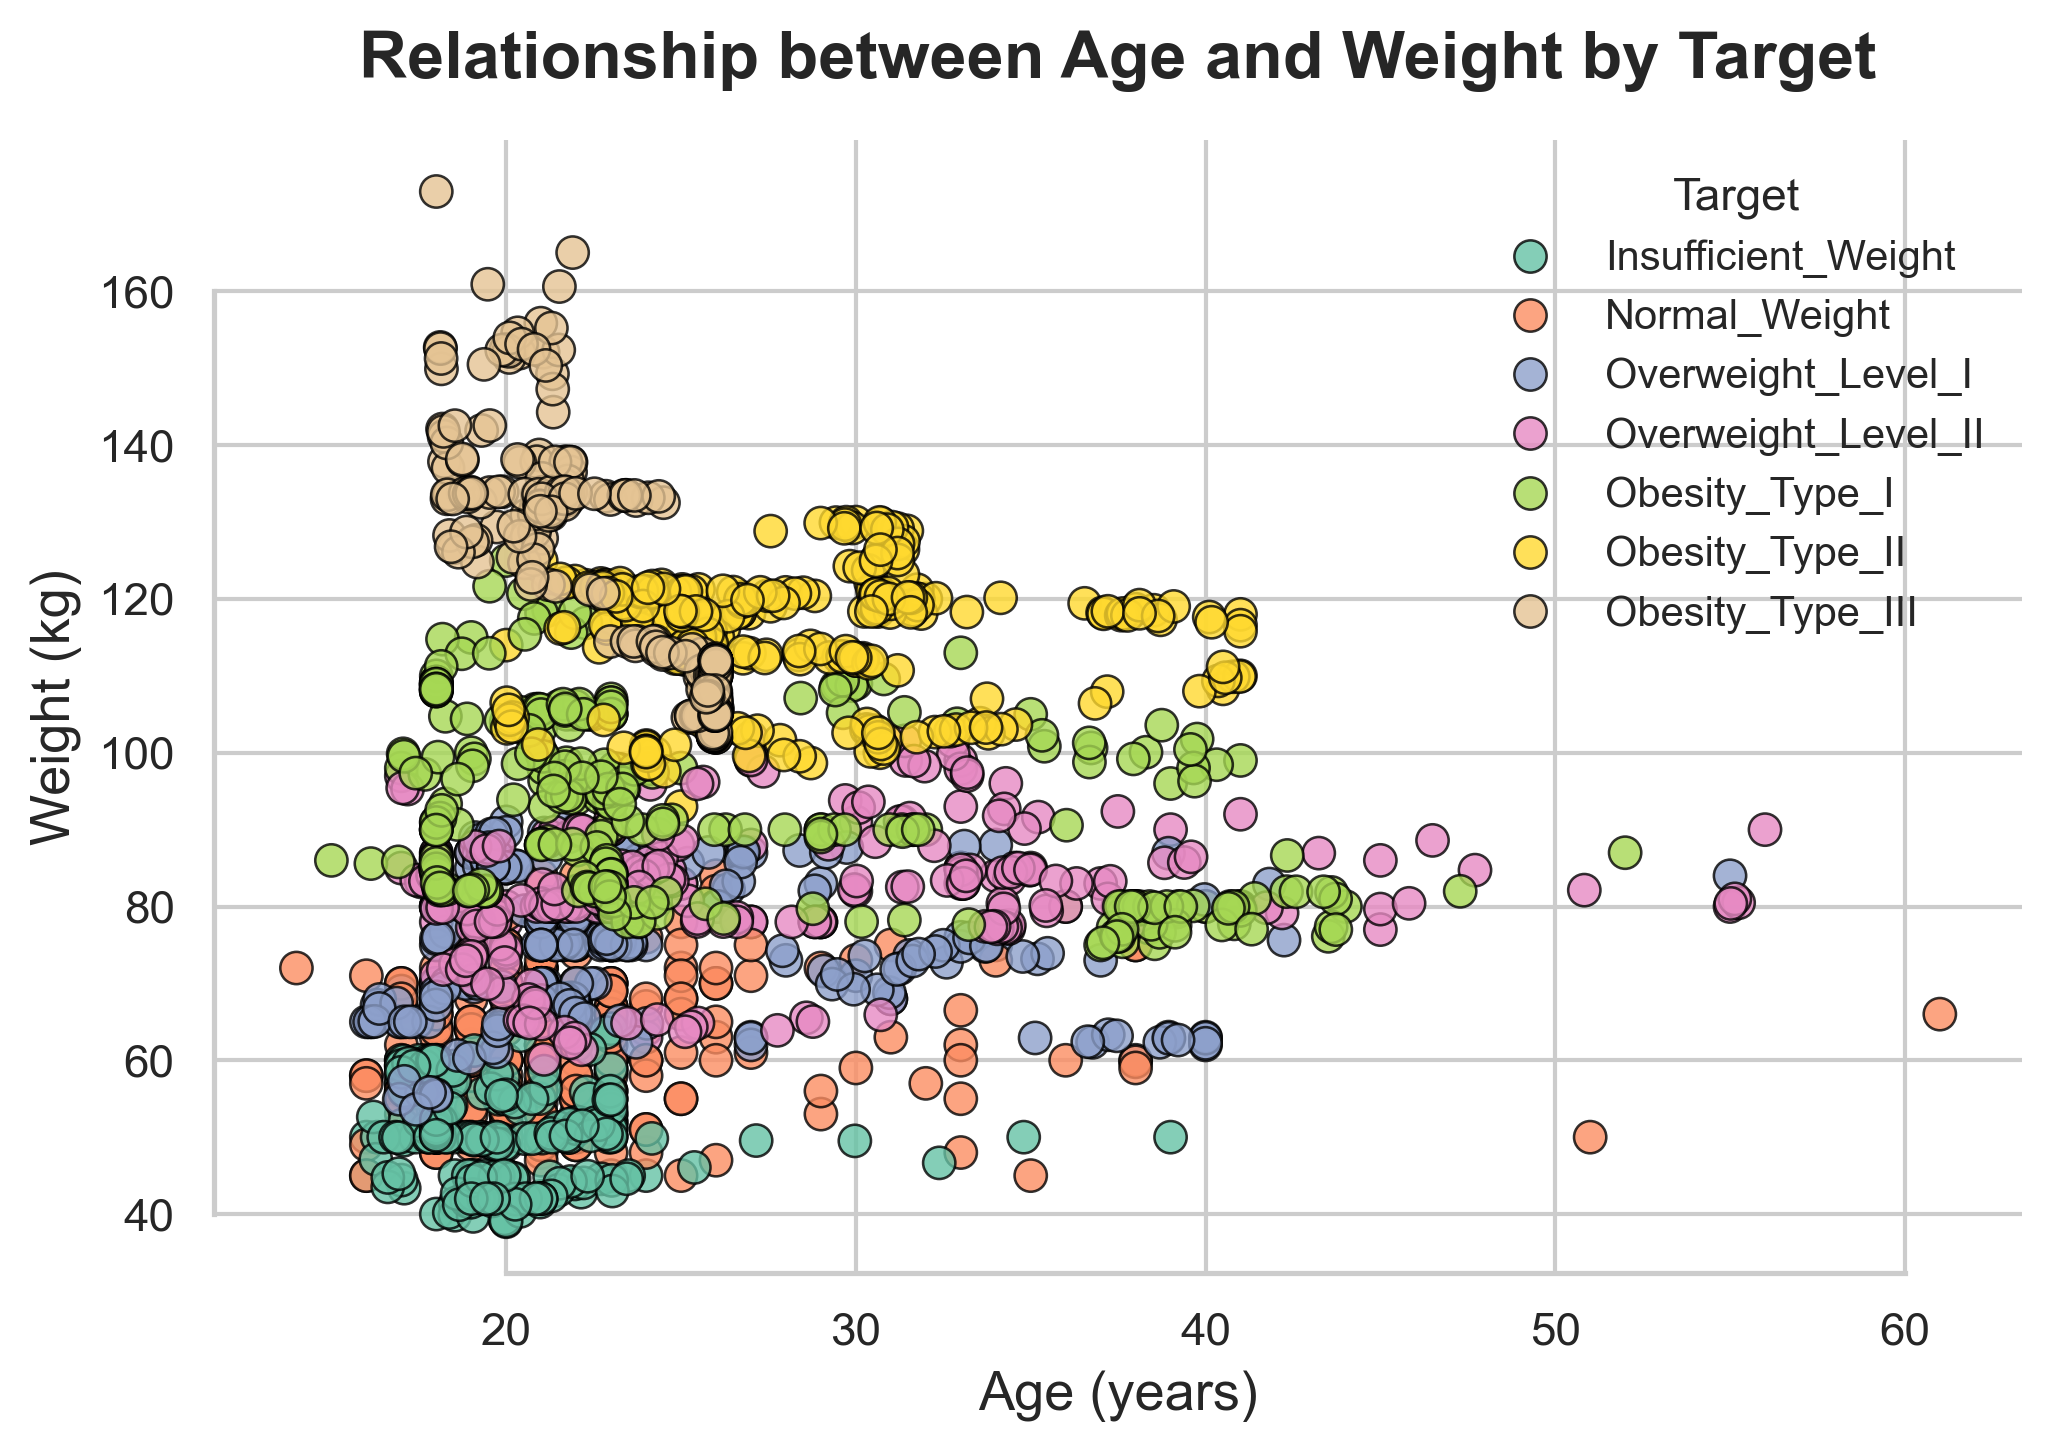

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define custom order
custom_order = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
    "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
]

# Convert Target to categorical with ordered categories
obesity["Target"] = pd.Categorical(obesity["Target"], categories=custom_order, ordered=True)

plt.figure(figsize=(7,5))
sns.set_theme(style="whitegrid")

ax = sns.scatterplot(
    data=obesity,
    x="Age",
    y="Weight",
    hue="Target",        
    palette="Set2",
    s=60,
    edgecolor="black",
    alpha=0.8
)

ax.set_title("Relationship between Age and Weight by Target", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Age (years)", fontsize=13)
ax.set_ylabel("Weight (kg)", fontsize=13)

ax.legend(title="Target", fontsize=10, title_fontsize=11, frameon=False)

sns.despine(trim=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.savefig("age_weight_scatter_publication.png", dpi=300, bbox_inches="tight")
plt.show()

## Create Heatmap for Counting Correlation amongs the Numerical Features

In [17]:
# Select numerical columns only
numerical_df = obesity.select_dtypes(include=['int64', 'float64'])

In [18]:
# Calculate the correlations
corr = numerical_df.corr()

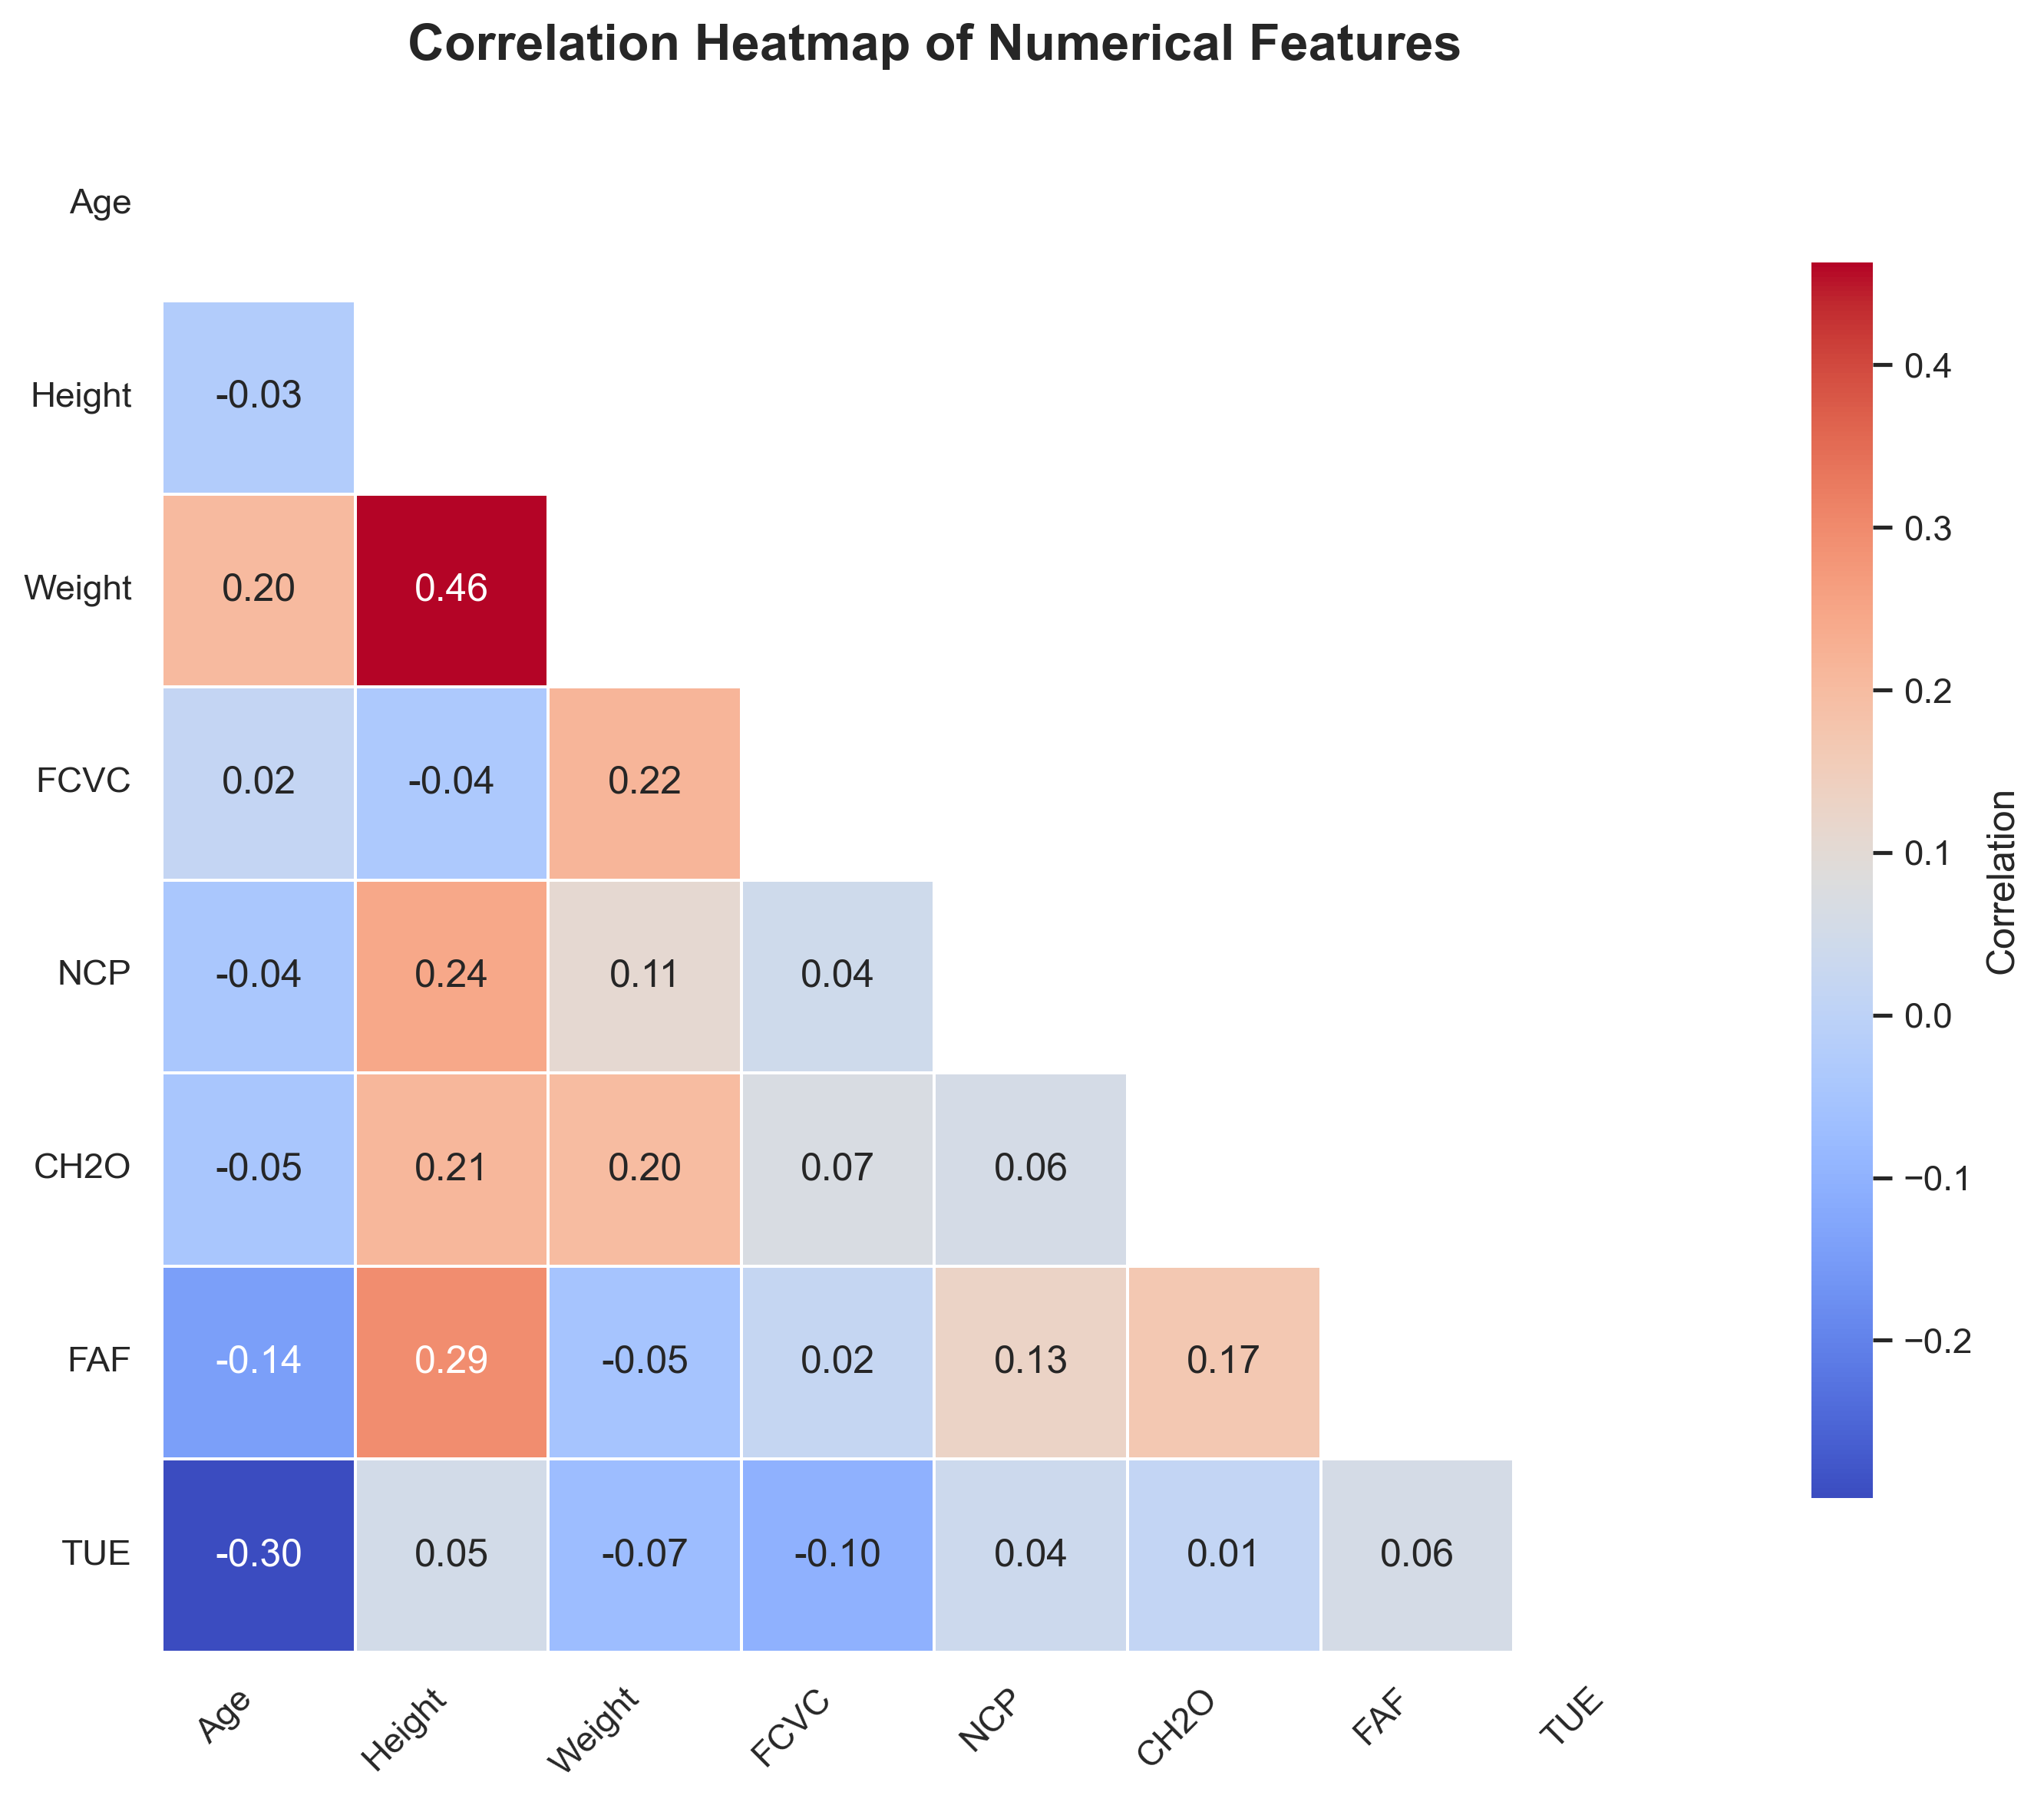

In [19]:
import numpy as np

plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

ax = sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",          # or 'RdBu_r', 'vlag', 'YlGnBu'
    annot=True,               # show correlation values
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True
)

ax.set_title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold", pad=15)
plt.xticks(fontsize=11, rotation=45, ha="right")
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Save at high resolution
plt.savefig("correlation_heatmap_publication.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: there are some signs of multicolinearity. For example the correlation between Weight and Height is 0.46. Solution: use tree based model for classification since tree based model can handle multicolinearity in the dataset.

## Plot the UMAP to Find the Clustering of the Numerical Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_df)

In [21]:
import umap.umap_ as umap

reducer = umap.UMAP(
    n_neighbors=15,     # smaller = more local structure
    min_dist=0.1,       # lower = tighter clusters
    n_components=2,     # 2D for visualization
    random_state=42
)

embedding = reducer.fit_transform(X_scaled)

C:\Users\ekadw\anaconda3\envs\BookTimeSeries\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [22]:
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df["Target"] = obesity["Target"]

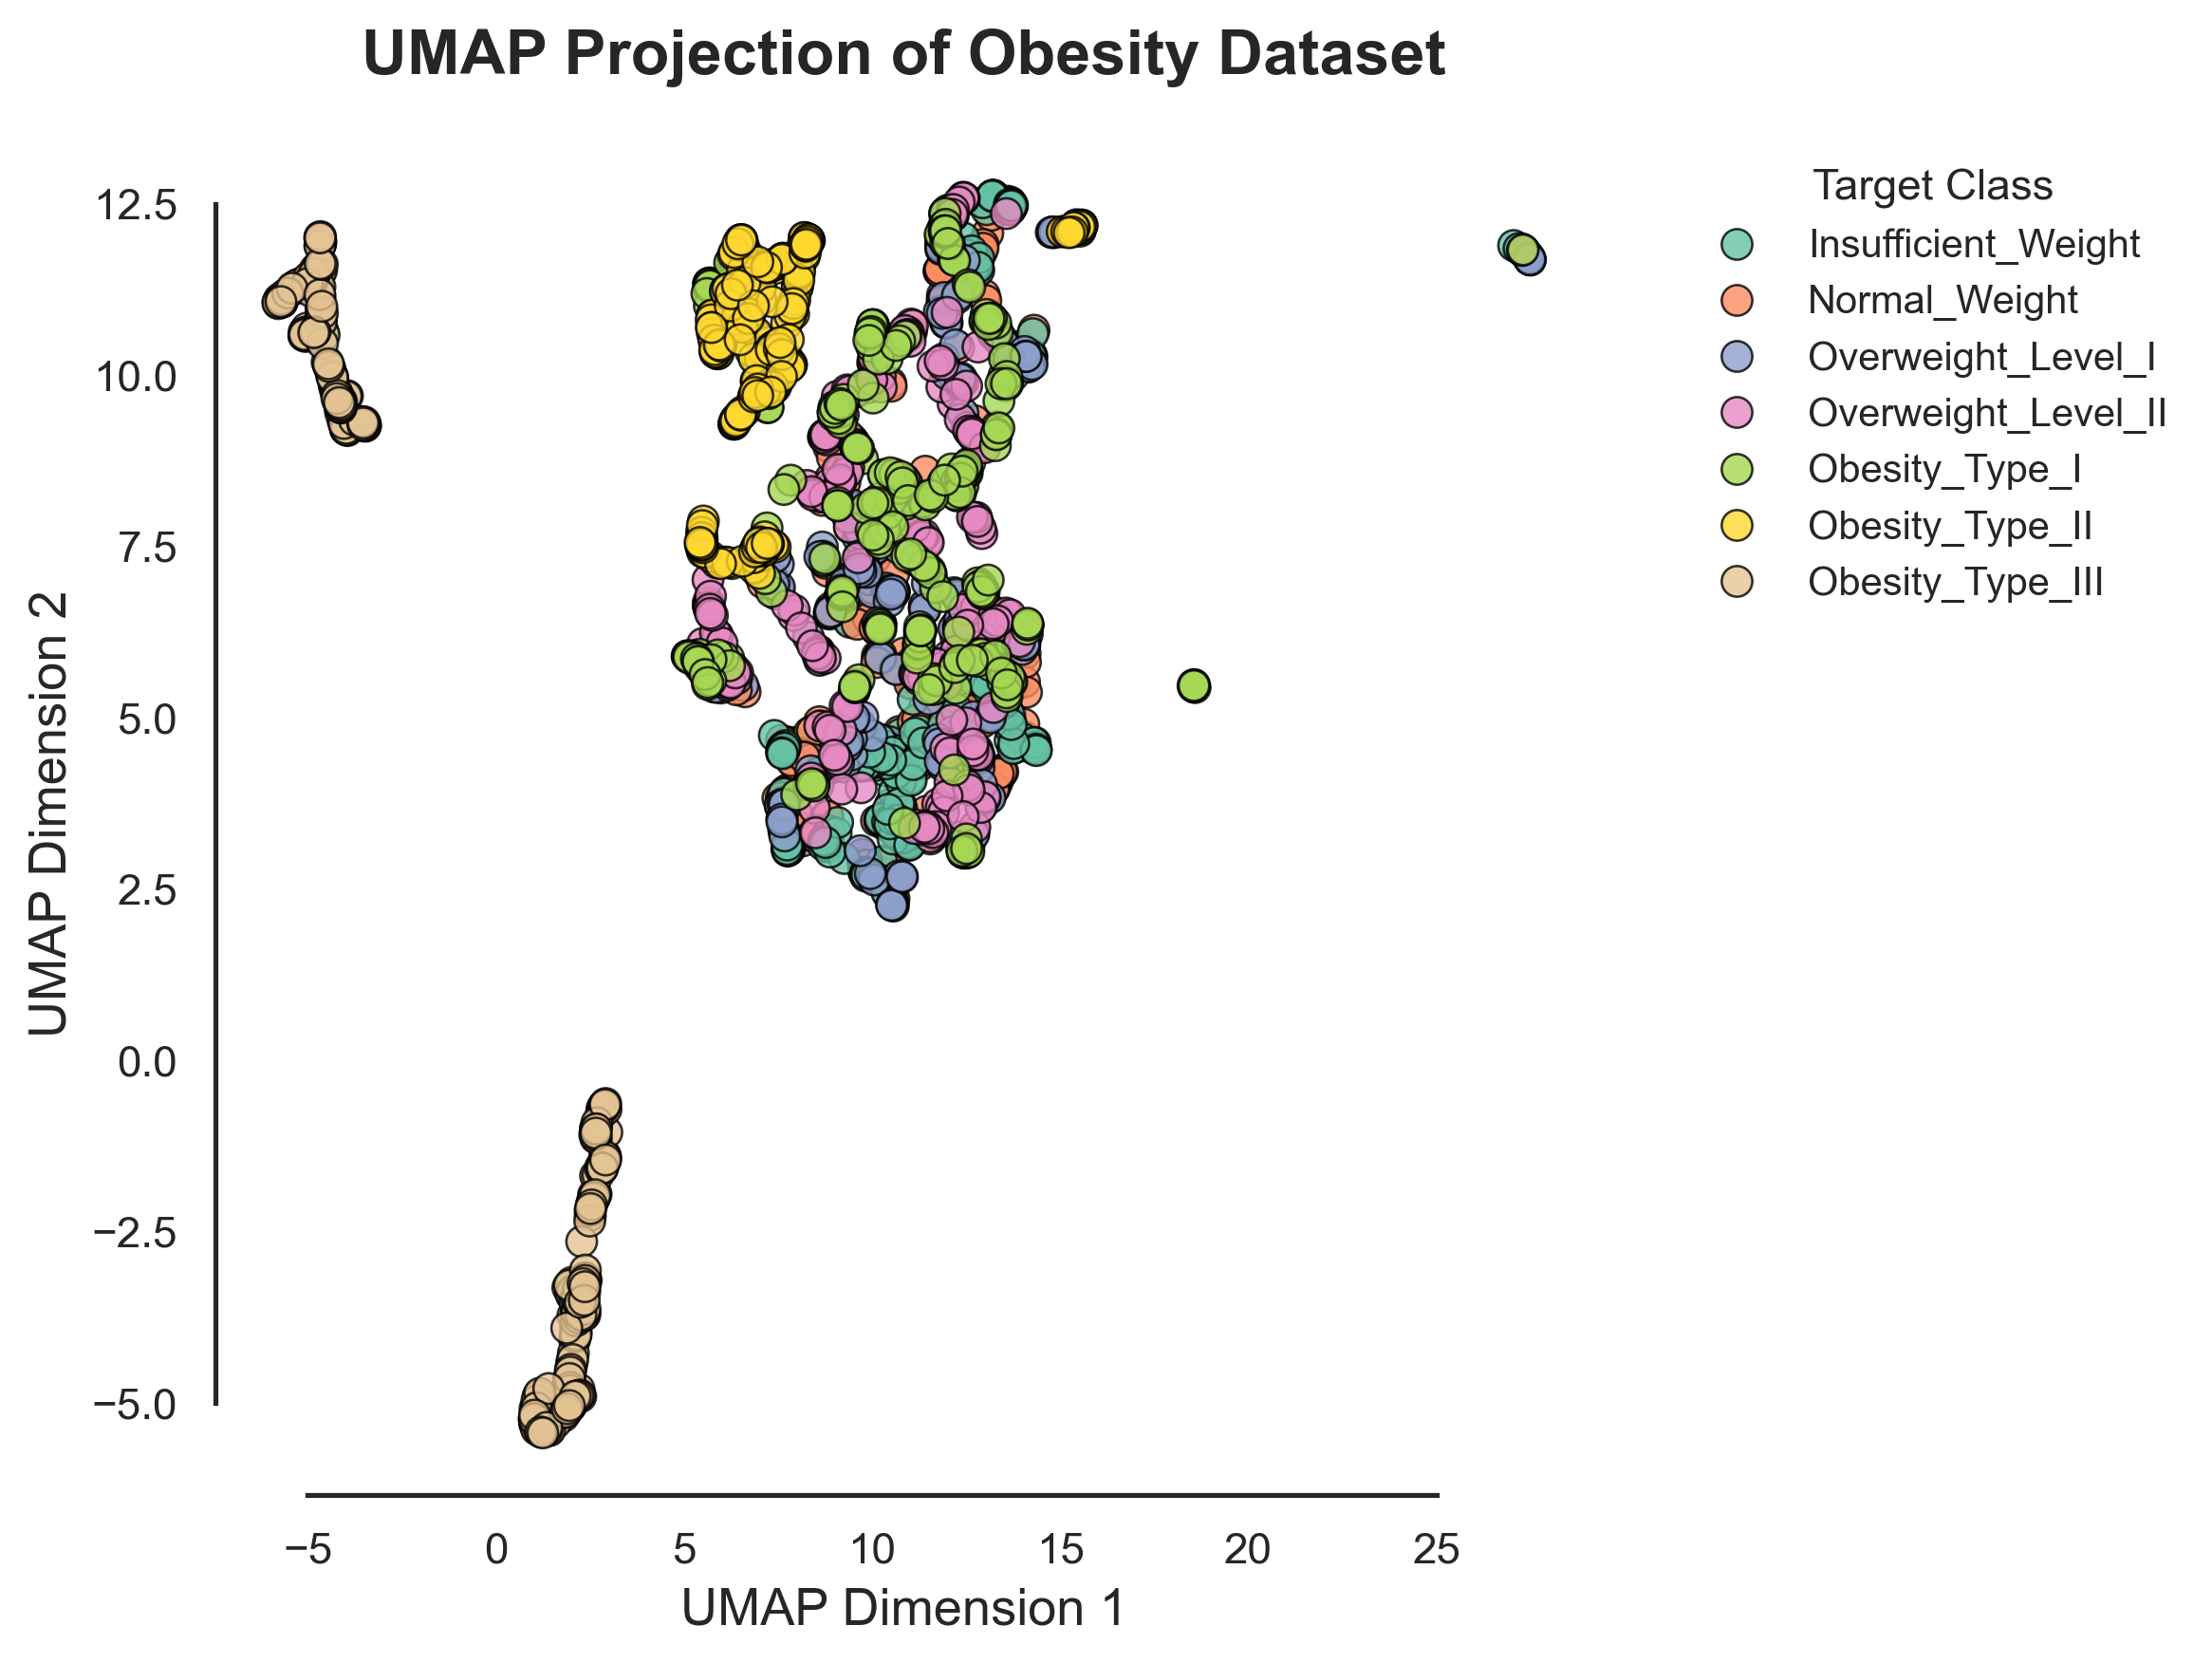

In [23]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Define consistent color order (same as your previous plots)
custom_order = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
    "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
]
palette = sns.color_palette("Set2", n_colors=len(custom_order))

ax = sns.scatterplot(
    data=umap_df,
    x="UMAP1", y="UMAP2",
    hue="Target",
    hue_order=custom_order,
    palette=palette,
    s=60,
    edgecolor="black",
    alpha=0.8
)

ax.set_title("UMAP Projection of Obesity Dataset", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("UMAP Dimension 1", fontsize=13)
ax.set_ylabel("UMAP Dimension 2", fontsize=13)

ax.legend(
    title="Target Class", 
    fontsize=10, 
    title_fontsize=11, 
    frameon=False,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

sns.despine(trim=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.savefig("umap_obesity_publication.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: For Obesity type II and type III classes, the cluster are easy to differentitate. Meanwhile the other 5 classes mix into one big cluster. The challenge hre for the classification model to differentiate these 5 classes that merged into one big cluster.